In [10]:
%run ./DataGen2.ipynb

plt.rcParams.update({'font.size': 14})

In [11]:
ID = 1

sigma_s = 32.0

In [12]:
folders = {1: 'standard',
          2: 'low_density',
          3: 'high_noise',
          4: 'different_densities',
          5: 'different_sizes',
          6: 'non_uniform_noise'}

NumberOfSimulations = 30
general_path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Deviations_from_standard/'

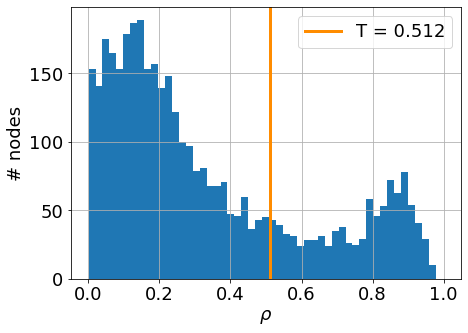

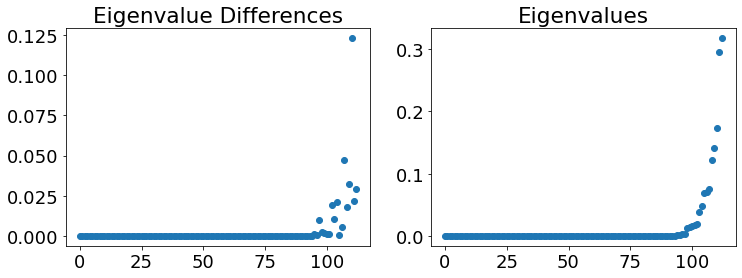

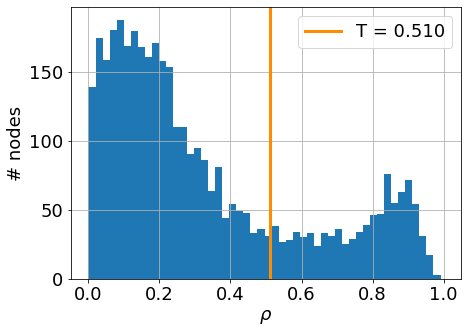

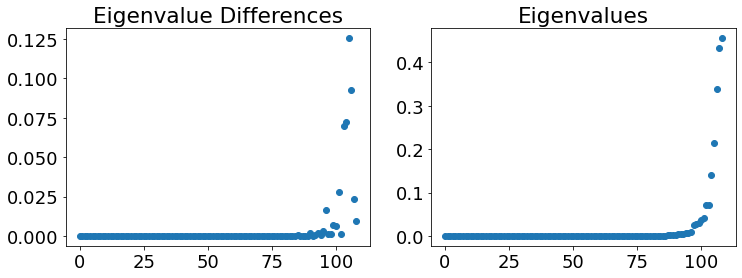

KeyboardInterrupt: 

In [12]:
reading_path = general_path + 'Data/' + folders[ID] + '/'
writing_path = general_path + 'Graphic_analysis/'

for run in range(NumberOfSimulations):
    filename = 'simulated_SMLM_' + str(ID) + '_' + str(run) + '.csv'
    data = pd.read_csv(reading_path + filename)
    data = modify_cov_matrix_format(data)
    N = len(data)
    T = compute_T_95(N = len(data), ListOfCovMatrices = data['cov_matrix'], sigma_s = sigma_s)
    labels = calling_graphic(data, sigma_s, T)
    labels_clean = remove_small_clusters(labels, min_size = 5)
    # put it in a pandas dataframe to save it as a csv
    df = pd.DataFrame(labels_clean, columns = ['graphic_label'])
    df.to_csv(writing_path + 'graphic_result_' + str(ID)+ '_' + str(run)+ '.csv')

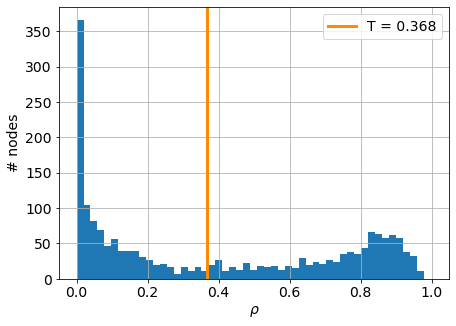

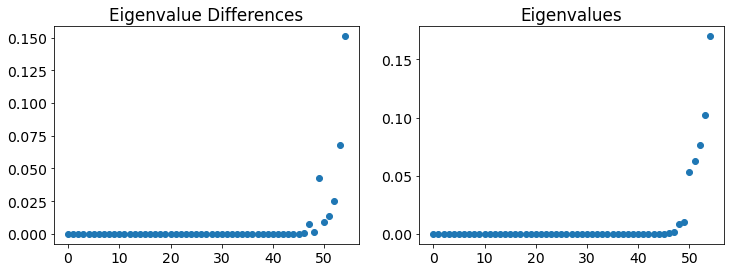

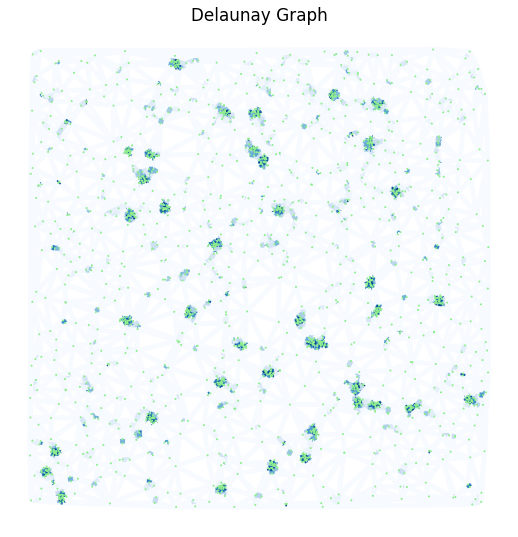

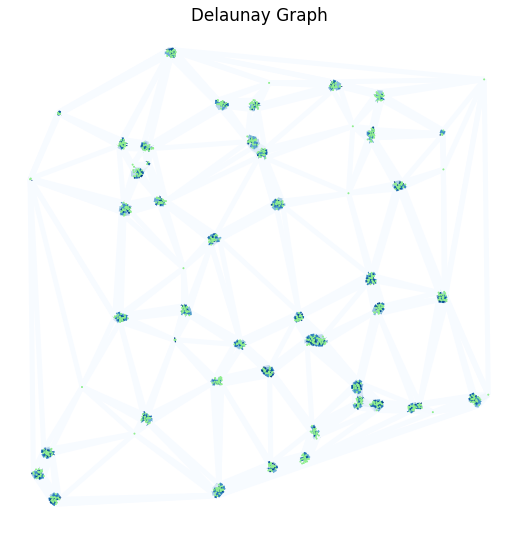

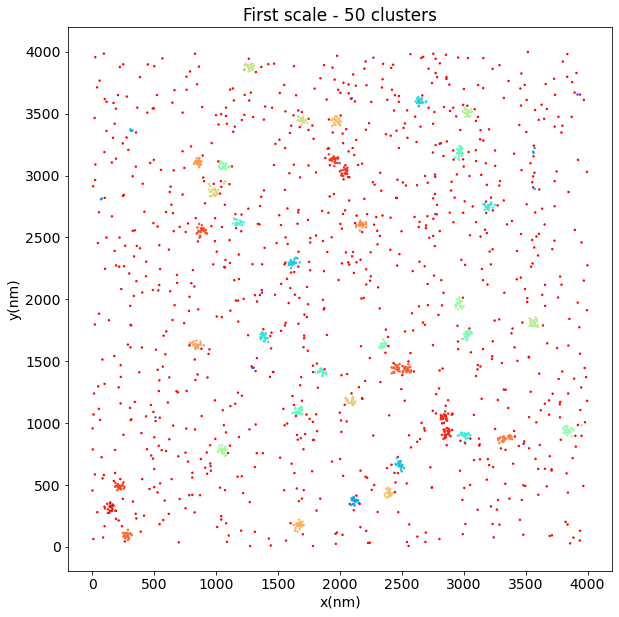

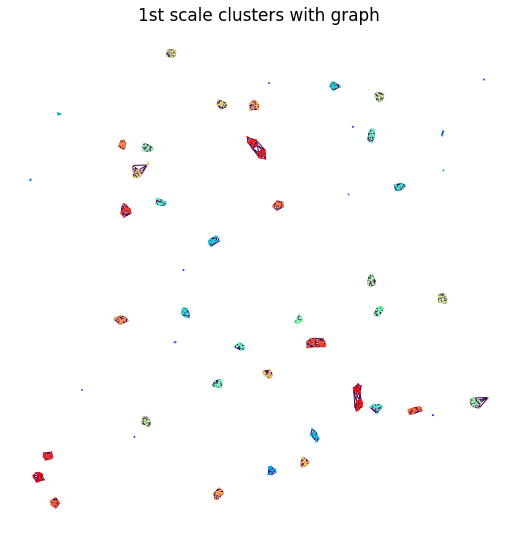

In [13]:
reading_path = general_path + 'Data/' + folders[ID] + '/'
filename = 'simulated_SMLM_1_3.csv'
data = pd.read_csv(reading_path + filename)
data = modify_cov_matrix_format(data)
N = len(data)
T = compute_T_95(N = len(data), ListOfCovMatrices = data['cov_matrix'], sigma_s = sigma_s)
labels = calling_graphic(data, sigma_s, T)
labels_clean = remove_small_clusters(labels, min_size = 5)
# put it in a pandas dataframe to save it as a csv
#df = pd.DataFrame(labels_clean, columns = ['graphic_label'])

In [9]:
unique, counts = np.unique(labels_clean, return_counts = True)

In [10]:
counts

array([1136,   19,   20,   21,   21,   21,   22,   21,   21,   20,   20,
         20,   21,   20,   20,   20,   20,   20,   20,   19,   19,   19,
         20,   20,   20,   19,   19,   20,   19,   19,   19,   20,   19,
         19,   18,   18,   19,   18,   18,   18,   18])

## Create the pdf images to illustrate each configuration for the report 

In [4]:
IDs = [1,2,3,4,5,6]

In [ ]:
for Id in IDs:
    

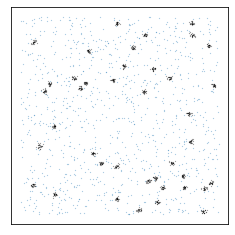

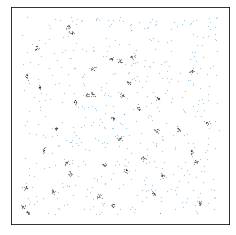

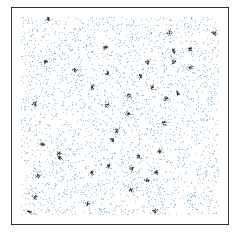

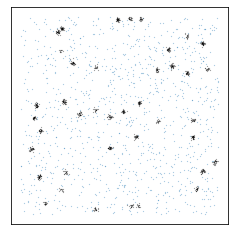

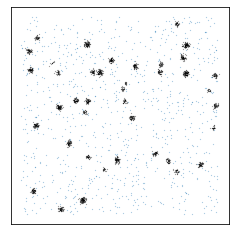

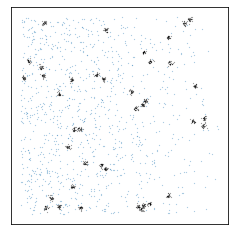

In [5]:
for Id in IDs:    
    reading_path = general_path + 'Data/' + folders[Id] + '/'
    filename = 'simulated_SMLM_' + str(Id) + '_2.csv'
    figures_saving_path = general_path + 'Results/Figures/'

    data = pd.read_csv(reading_path + filename)
    data = modify_cov_matrix_format(data)



    P              = data[['x','y']].to_numpy()
    labels         = data['labels_1'].to_numpy()


    not_noise_idx = np.where(labels != 0)
    noise_idx = np.where(labels == 0)

    plt.figure(figsize = (4,4))
    plt.scatter(P[noise_idx,0], P[noise_idx,1], c = 'tab:blue', s = 0.02)
    #plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = labels[not_noise_idx], cmap = 'rainbow_r', s = 1)
    plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = 'black', s = 0.02)
    plt.gca().set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(figures_saving_path + 'point_cloud_' + str(Id) + '.png')

([], [])

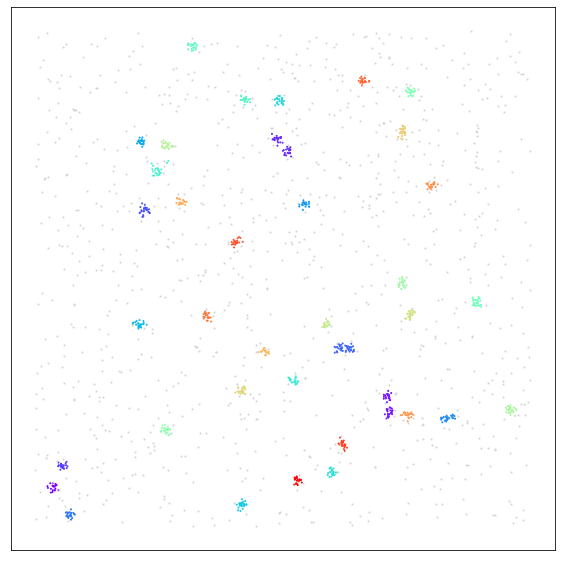

In [21]:
P              = data[['x','y']].to_numpy()
not_noise_idx = np.where(labels_clean != 0)
noise_idx = np.where(labels_clean == 0)
plt.figure(figsize = (10,10))
plt.scatter(P[not_noise_idx,0], P[not_noise_idx,1], c = labels_clean[not_noise_idx], cmap = 'rainbow', s = 1)
#plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = labels[not_noise_idx], cmap = 'rainbow_r', s = 1)
plt.scatter(P[noise_idx, 0], P[noise_idx, 1], c = 'lightgray', s = 1)
plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
#plt.savefig(figures_saving_path + 'point_cloud_' + str(Id) + '.png')